In [207]:
import numpy as np
x = np.array([80, 65, 95, 95, 85, 75, 90, 65])  # Attendance
x2 = np.array([75, 70, 85, 100, 65, 55, 90, 80]) # Homework
y = np.array([1, 0, 1, 1, 0 , 0, 1, 1]) # Pass


# Separamos los conjuntos por prueba y entrenamiento
x_1 = x[:6]
x_1v = x[-2:]
x2_1 = x2[:6]
x2_v = x2[-2:]
y_t = y[:6]
y_v = y[-2:]

## Algoritmo de regresión logística con columna Attendance



Para la inicialización de nuestros valores $\theta$, nos basamos en la inicialización de Xavier-Glorot : https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal

In [208]:
import tensorflow as tf
tf.random.set_seed(24)
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2, 1))
n = x_1.size

## Crearemos un grid search para encontrar el $\alpha$ óptimo dentro de un rango.

In [209]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))
        delta = h_0 - y_t
        delta_x1 = delta * x_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x1)


        costo = - np.mean(y_t * np.log(h_0+1e-10) + (1 - y_t) * np.log(1 - h_0+1e-10)) # Calculamos costo con cross entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-209-b8c56b20b3f9>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))


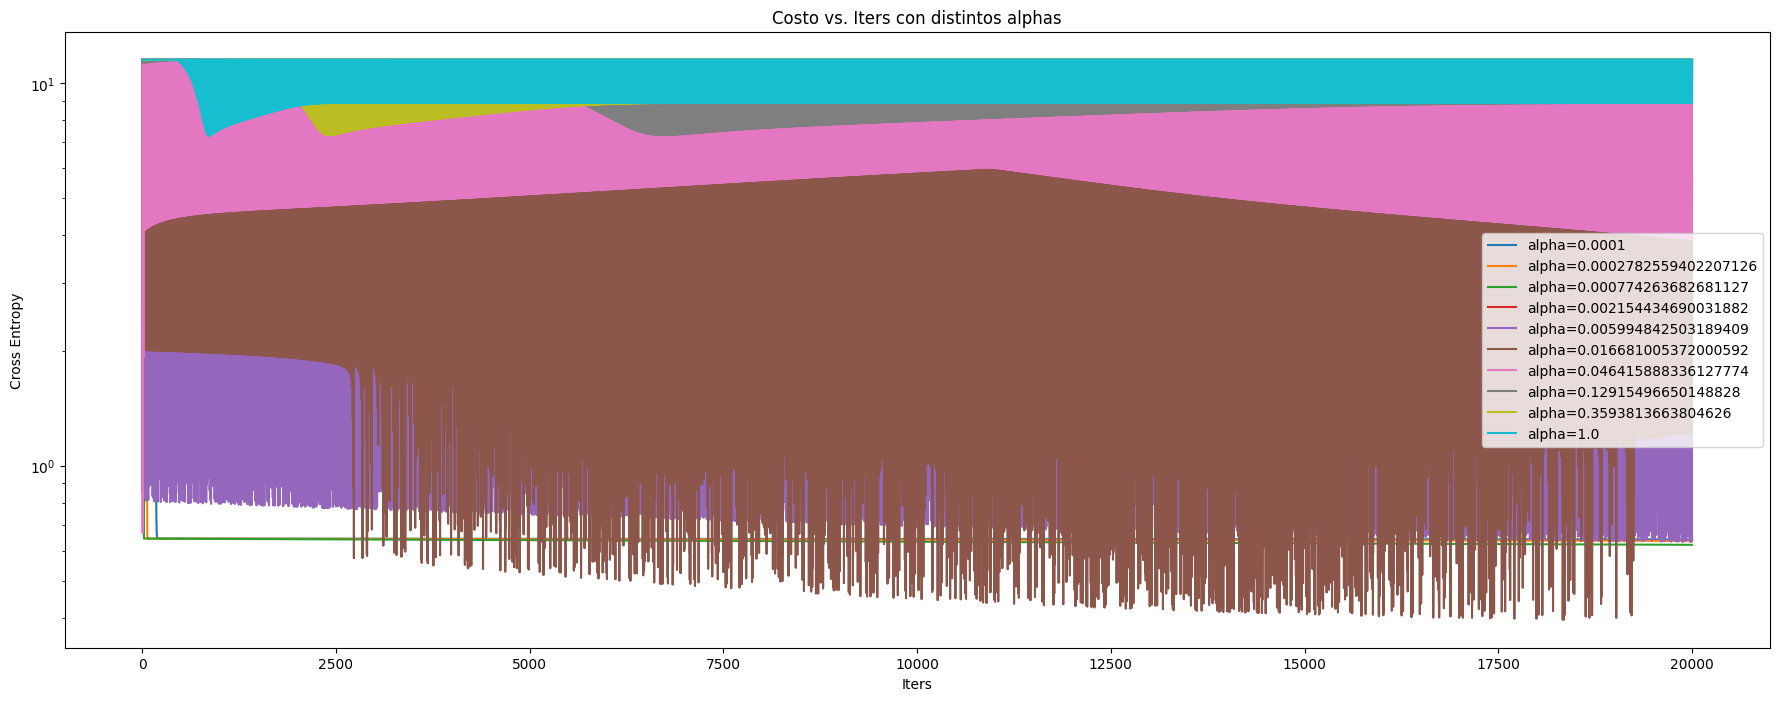

Learning Rate: 0.0001
  Costo Final: 0.642369
  theta_0: -1.100451, theta_1: 0.015303

Learning Rate: 0.0003
  Costo Final: 0.636695
  theta_0: -1.242669, theta_1: 0.017001

Learning Rate: 0.0008
  Costo Final: 0.621747
  theta_0: -1.627706, theta_1: 0.021599

Learning Rate: 0.0022
  Costo Final: 1.135576
  theta_0: -2.942086, theta_1: 0.087555

Learning Rate: 0.0060
  Costo Final: 5.670119
  theta_0: -6.331654, theta_1: 0.010788

Learning Rate: 0.0167
  Costo Final: 11.501538
  theta_0: -15.389817, theta_1: 0.618966

Learning Rate: 0.0464
  Costo Final: 11.512925
  theta_0: -43.209639, theta_1: 0.045068

Learning Rate: 0.1292
  Costo Final: 11.512925
  theta_0: -118.394261, theta_1: 2.902640

Learning Rate: 0.3594
  Costo Final: 11.512925
  theta_0: -327.620510, theta_1: 7.849974

Learning Rate: 1.0000
  Costo Final: 11.512925
  theta_0: -909.804978, theta_1: 21.616226



In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 0.0167$ muestra los mejores resultados con un costo final de 11.501538. En este caso, utilizaremos el $\alpha = 0.0167.$ ( Se utiliza el máximo porque se multiplica por -1 para poder graficar los valores en un rango positivo).

In [211]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [212]:
# Extraemos solo los de alpha = 0.0167
theta_0 = x_theta_0[5]
theta_1 = x_theta_1[5]
print(theta_0, theta_1)

-15.389816820805487 0.6189661208850672


In [213]:
y_pred = []
for i in range(0, len(x_1v)):
  y_pred.append(round(1/(1 + np.exp(-(theta_0 + theta_1*x_1v[i])))))

In [214]:
y_pred

[1, 1]

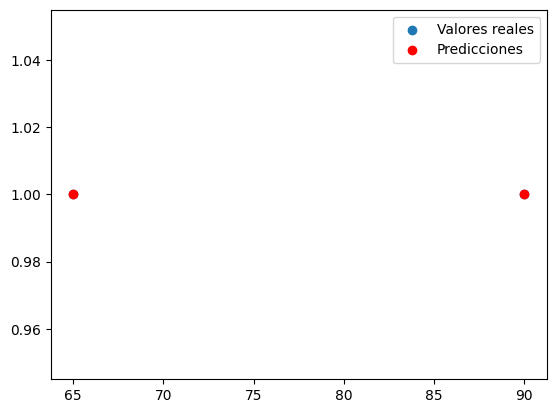

In [215]:
import matplotlib.pyplot as plt
plt.scatter(x_1v, y_v)
plt.scatter(x_1v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [216]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1

Accuracy = (true_pos + true_neg) / len(y_v)

if (true_pos + false_pos) == 0:
    Precision = 0
else:
    Precision = true_pos / (true_pos + false_pos)

if (true_pos + false_neg) == 0:
    Recall = 0
else:
    Recall = true_pos / (true_pos + false_neg)
if (Precision + Recall) == 0:
    F_1 = 0
else:
    F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0


# Algoritmo de regresión logística con columna Homework

Se hará exactamente lo mismo que anteriormente, pero ahora con la columna Homework

In [217]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))
        delta = h_0 - y_t
        delta_x2 = delta * x2_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x2)


        costo = - np.mean(y_t * np.log(h_0+1e-10) + (1 - y_t) * np.log(1 - h_0+1e-10))   # Calculamos costo con Cross Entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-217-23f1bb252c48>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))


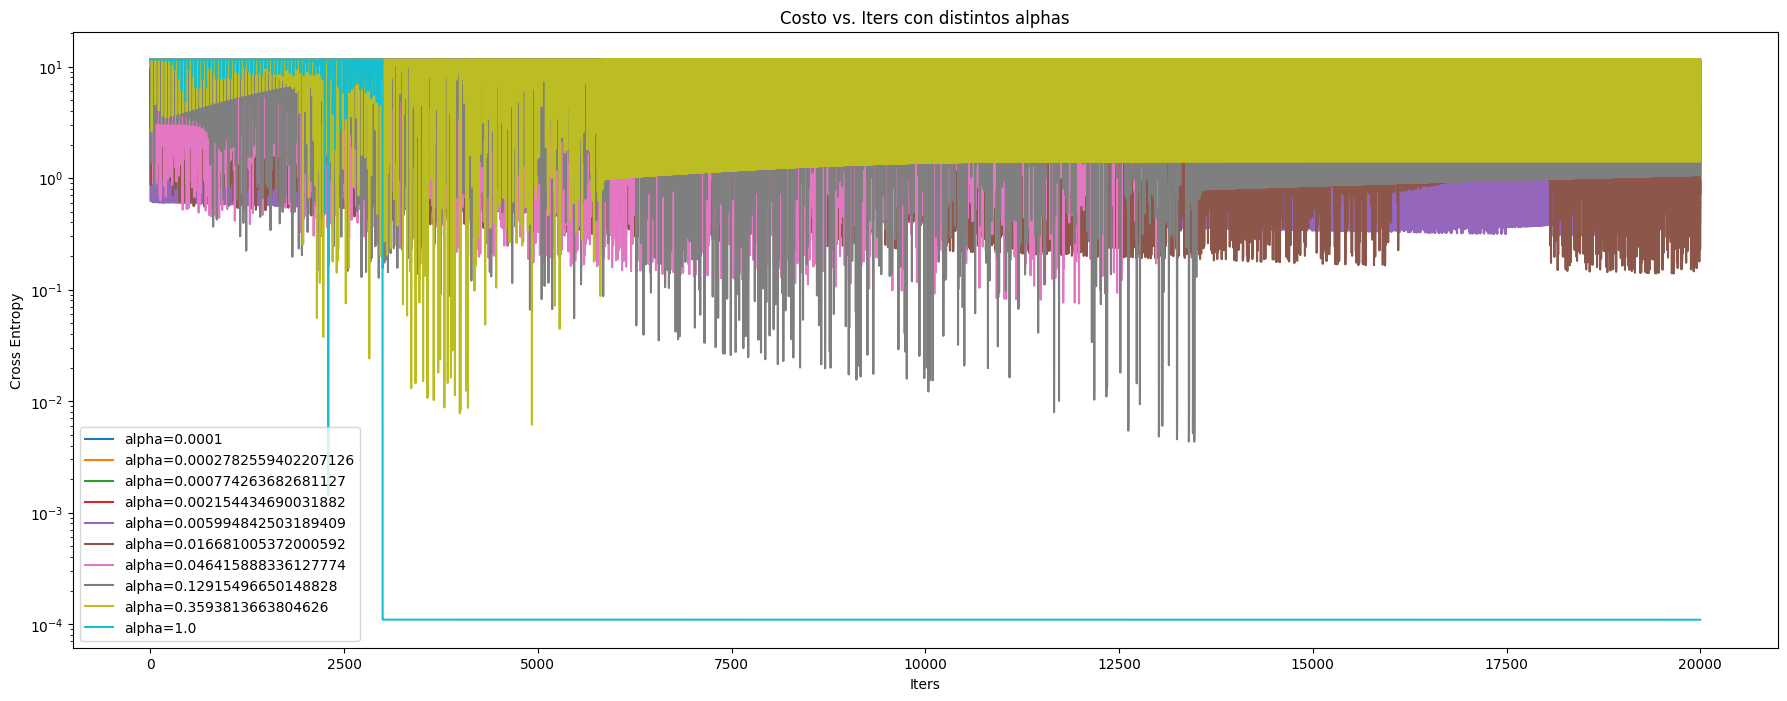

Learning Rate: 0.0001
  Costo Final: 0.600718
  theta_0: -1.152038, theta_1: 0.018926

Learning Rate: 0.0003
  Costo Final: 0.586046
  theta_0: -1.380724, theta_1: 0.021895

Learning Rate: 0.0008
  Costo Final: 0.549501
  theta_0: -1.982630, theta_1: 0.029730

Learning Rate: 0.0022
  Costo Final: 0.717328
  theta_0: -3.994677, theta_1: 0.090489

Learning Rate: 0.0060
  Costo Final: 0.400356
  theta_0: -8.996380, theta_1: 0.191026

Learning Rate: 0.0167
  Costo Final: 11.507843
  theta_0: -24.123883, theta_1: 0.392068

Learning Rate: 0.0464
  Costo Final: 5.875157
  theta_0: -67.076862, theta_1: 2.620584

Learning Rate: 0.1292
  Costo Final: 1.065873
  theta_0: -173.458440, theta_1: 1.062495

Learning Rate: 0.3594
  Costo Final: 11.512925
  theta_0: -441.371865, theta_1: 6.426698

Learning Rate: 1.0000
  Costo Final: 0.000110
  theta_0: -232.531630, theta_1: 3.207809



In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

# Mostraremos este rango, pues es donde hubo realmente cambios significativos
plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 0.3593$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 0.3593.$ ( Se utiliza el máximo porque se multiplica por -1 para poder graficar los valores en un rango positivo).

In [219]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [220]:
# Extraemos solo los de alpha = 0.3593
theta_0 = x_theta_0[-2]
theta_1 = x_theta_1[-2]
print(theta_0, theta_1)

-441.37186490897955 6.426697930384888


In [221]:
y_pred = []
for i in range(0, len(x2_v)):
  y_pred.append(round(1/(1 + np.exp(-(theta_0 + theta_1*x2_v[i])))))

In [222]:
y_pred

[1, 1]

In [223]:
len(y_v)

2

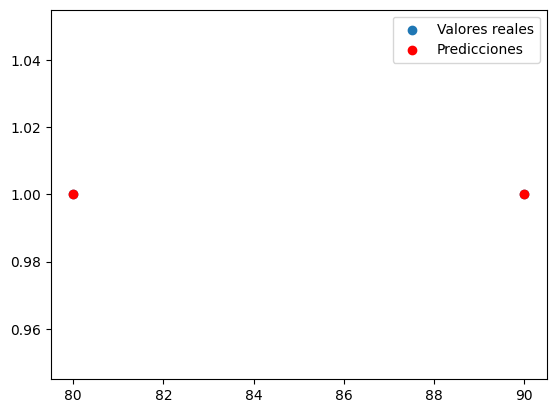

In [224]:
import matplotlib.pyplot as plt
plt.scatter(x2_v, y_v)
plt.scatter(x2_v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [225]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1


Accuracy = (true_pos + true_neg )/ len(y_v)
Precision = (true_pos)/ (true_pos + false_pos)
Recall = (true_pos)/ (true_pos + false_neg)
F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0
